# Projeto Referências

In [1]:
import graph_tool_extras as gte
import pandas as pd
import csv
import ast
from graph_tool import draw
import netpixi

PATH = '../Datasets/artigos.csv'
MAX_LINES = 20000  


In [11]:
paper_refs_dict = {}

with open(PATH, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)  
    count = 0
    for line in reader:
        if count >= MAX_LINES:
            break
        
        references_str = line[3]  # Coluna de referências
        paper_id       = line[7]  # Coluna de ID


        # Converter a string de referências em lista
        try:
            ref_list = ast.literal_eval(references_str)
            if not isinstance(ref_list, list):
                ref_list = []
        except:
            ref_list = []

        paper_refs_dict[paper_id] = ref_list
        
        count += 1

print(f"Lidas {count} linhas do CSV.")
print("Exemplo de 5 papers e suas referências:")
i = 0
for pid, refs in paper_refs_dict.items():
    print("ID:", pid, "- Refs:", refs)
    i += 1
    if i == 5:
        break


Lidas 20000 linhas do CSV.
Exemplo de 5 papers e suas referências:
ID: 4ab3735c-80f1-472d-b953-fa0557fed28b - Refs: ['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa16da-3cc8-4af6-9d66-48037e915d76', '35cb45c3-9408-4096-ab30-bc2e4de3fb5d', '661a342e-a911-4420-b67d-51c75d3b14e9', '779553f3-e4c1-456e-bc01-5eb9d9567541', 'b24ba5c0-fee8-4a3e-9330-17f6564856cd', 'fd1c676d-1296-4f19-89b4-17c7ecd270f3']
ID: 4ab39729-af77-46f7-a662-16984fb9c1db - Refs: ['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b1187381-cc24-471e-b288-5da09c3d4ca9', 'ecf8e7f0-cac6-47e4-9c29-f4241b0e1d7a']
ID: 4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de - Refs: ['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e57ca-d190-4bc7-b7ad-2e33aca2f574', '508ea83a-035b-4542-a315-9247c172d255', '666a65af-8657-43f6-b765-f2b72a16726a', '8100bfb7-3f6a-4269-bba8-7c4a6a578570', '8e035cc6-d692-4532-bb3c-a6a34b4db83a', 'e10a00d9-bb59-4f19-8f1c-85917bc03b5f']
ID: 4ab3a98c-3620-47ec-b578-884ecf4a6206 - Refs: ['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac52a1-dfa

## Construção do grafo

Para lembrar os detalhes sobre as bibliotecas e funções, reveja o terceiro notebook da Aula 3.

In [8]:
g_citation = gte.Graph(directed=True)

paper_ids = set(paper_refs_dict.keys())
for pid in paper_ids:
    g_citation.add_vertex_by_id(pid)

for citing_paper, ref_list in paper_refs_dict.items():
    for ref_id in ref_list:
        if ref_id in paper_ids:
            g_citation.add_edge_by_ids(citing_paper, ref_id)

print("Vértices (papers):", g_citation.num_vertices())
print("Arestas (citações):", g_citation.num_edges())


Vértices (papers): 20000
Arestas (citações): 2463


In [4]:
vsize = g_citation.new_vertex_property("double")
for v in g_citation.vertices():
    vsize[v] = 5  
g_citation.vertex_properties["size"] = vsize

epw = g_citation.new_edge_property("double")
for e in g_citation.edges():
    epw[e] = 0.5  
g_citation.edge_properties["penwidth"] = epw

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, 'papers_citation_100.net.gz')

render_obj = netpixi.render('papers_citation_100.net.gz', infinite=True)
render_obj


In [24]:
g_citation = gte.clean(g_citation)

vsize = g_citation.new_vertex_property("double")
for v in g_citation.vertices():
    vsize[v] = 5  
g_citation.vertex_properties["size"] = vsize

epw = g_citation.new_edge_property("double")
for e in g_citation.edges():
    epw[e] = 0.5  
g_citation.edge_properties["penwidth"] = epw

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, 'papers_citation_100.net.gz')
netpixi.render('papers_citation_100.net.gz', infinite=True)


In [26]:
import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi

g_citation = gte.load('papers_citation_100.net.gz')

size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    deg = v.in_degree() + v.out_degree()
    size_prop[v] = deg * 2 + 5  


g_citation.vp["size"] = size_prop


layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)


gte.save(g_citation, 'papers_citation_degree_manual.net.gz')


r = netpixi.render('papers_citation_degree_manual.net.gz', infinite=True)
r


In [29]:

from graph_tool.centrality import betweenness
import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi


g_citation = gte.load('papers_citation_100.net.gz')


betw_map, _ = betweenness(g_citation)


size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    val = betw_map[v]

    size_prop[v] = val * 1000000 + 5


g_citation.vp["size"] = size_prop


layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)


gte.save(g_citation, 'papers_citation_betweenness.net.gz')
r = netpixi.render('papers_citation_betweenness.net.gz', infinite=True)
r


In [31]:
from graph_tool.centrality import closeness
import math
import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi


g_citation = gte.load('papers_citation_100.net.gz')


clos_map = closeness(g_citation)


size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    val = clos_map[v]
    if math.isinf(val) or math.isnan(val):
        size_prop[v] = 5.0
    else:
        size_prop[v] = val * 20 + 5

g_citation.vp["size"] = size_prop

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, 'papers_citation_closeness.net.gz')
r = netpixi.render('papers_citation_closeness.net.gz', infinite=True)
r


In [32]:

import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi

g_citation = gte.load("papers_citation_100.net.gz")


c_prop = gte.burt_constraint(g_citation)


size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    val = c_prop[v]
    size_prop[v] = val * 8.0 + 10.0

g_citation.vp["size"] = size_prop


layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)


gte.save(g_citation, "papers_citation_constraint.net.gz")


r = netpixi.render("papers_citation_constraint.net.gz", infinite=True)
r


In [9]:


import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi
import cpnet


g_citation = gte.load("papers_citation_100.net.gz")


coreness_map, level_map = gte.coreness(g_citation, cpnet.Rombach)

size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    val = coreness_map[v]  
    size_prop[v] = val * 7.0 + 10.0

g_citation.vp["size"] = size_prop

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)


gte.save(g_citation, "papers_citation_coreness_continuo.net.gz")


r = netpixi.render("papers_citation_coreness_continuo.net.gz", infinite=True)
r


In [10]:
import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi
import cpnet


g_citation = gte.load("papers_citation_100.net.gz")


c_map, level_map, prob_map = gte.coreness(g_citation, cpnet.BE, test=True)

size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    val = c_map[v] 
    size_prop[v] = val * 20.0 + 10.0

g_citation.vp["size"] = size_prop

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, "papers_citation_coreness_discreto.net.gz")

r = netpixi.render("papers_citation_coreness_discreto.net.gz", infinite=True)
r


100%|██████████| 100/100 [07:21<00:00,  4.42s/it]


Min degree: 1
Max degree: 61


Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Calculating best minimal value for power law fit


(np.True_, np.float64(0.006527117511852987))

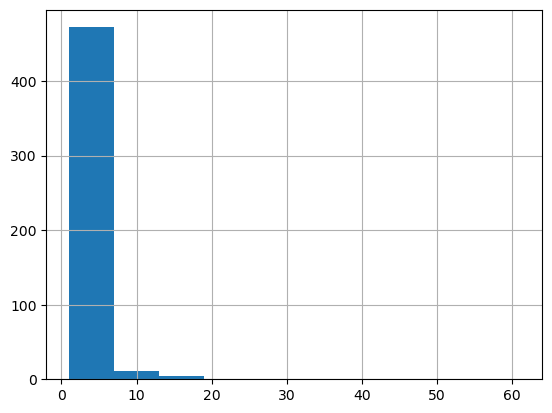

In [35]:
import netpixi
import graph_tool_extras as gte
import distribution as dst
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

g = gte.load("papers_citation_100.net.gz")
g = gte.clean(g)

degrees = g.get_total_degrees()
print("Min degree:", np.min(degrees))
print("Max degree:", np.max(degrees))
degrees.hist()

dst.not_normal(degrees)

dst.more_powerlaw_than_lognormal(degrees)

dst.more_powerlaw_than_exponential(degrees)



In [29]:
import graph_tool_extras as gte
import netpixi
import graph_tool.draw as draw

g_citation = gte.load('papers_citation_100.net.gz')

if "paper_id" in g_citation.vp:
    paper_id_prop = g_citation.vp["paper_id"]
else:

    paper_id_prop = g_citation.new_vertex_property("string")
    for i, v in enumerate(g_citation.vertices()):
        paper_id_prop[v] = f"temp_{i}"
    g_citation.vp["paper_id"] = paper_id_prop


degree_prop = g_citation.new_vertex_property("double")
for v in g_citation.vertices():
    degree_prop[v] = v.in_degree() + v.out_degree()


g_citation.vp["degree"] = degree_prop


sorted_by_degree = sorted(g_citation.vertices(), 
                          key=lambda vert: degree_prop[vert],
                          reverse=True)


print("Top 10 nós por grau:")
for v in sorted_by_degree[:10]:
    print(f"Paper ID: {paper_id_prop[v]} - Grau: {degree_prop[v]}")

layout = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout)

gte.save(g_citation, 'papers_citation_degree_withid.net.gz')
r = netpixi.render('papers_citation_degree_withid.net.gz', infinite=True)
r


Top 10 nós por grau:
Paper ID: temp_124 - Grau: 61.0
Paper ID: temp_366 - Grau: 40.0
Paper ID: temp_406 - Grau: 35.0
Paper ID: temp_73 - Grau: 19.0
Paper ID: temp_132 - Grau: 16.0
Paper ID: temp_352 - Grau: 15.0
Paper ID: temp_196 - Grau: 14.0
Paper ID: temp_391 - Grau: 13.0
Paper ID: temp_365 - Grau: 11.0
Paper ID: temp_393 - Grau: 10.0


In [37]:
import graph_tool_extras as gte
import graph_tool.draw as draw
import netpixi
from graph_tool.centrality import betweenness, closeness
import cpnet  


g_citation = gte.load('papers_citation_100.net.gz')


if "paper_id" in g_citation.vp:
    paper_id_prop = g_citation.vp["paper_id"]
else:
    paper_id_prop = g_citation.new_vertex_property("string")
    for i, v in enumerate(g_citation.vertices()):
        paper_id_prop[v] = f"temp_{i}"
    g_citation.vp["paper_id"] = paper_id_prop



degree_prop = g_citation.new_vertex_property("double")
for v in g_citation.vertices():
    degree_prop[v] = v.in_degree() + v.out_degree()


betw_prop, _ = betweenness(g_citation)


clos_prop = closeness(g_citation)



coreness_continuo, level_map_c = gte.coreness(g_citation, cpnet.Rombach)



coreness_discreto, level_map_d, prob_map = gte.coreness(g_citation, cpnet.BE, test=True)
p
def top5_sorted(prop_map):
    """Retorna os vértices ordenados decrescentemente de acordo com prop_map"""
    return sorted(g_citation.vertices(), key=lambda v: prop_map[v], reverse=True)[:5]


top5_deg = top5_sorted(degree_prop)
top5_betw = top5_sorted(betw_prop)
top5_clos = top5_sorted(clos_prop)
top5_continuo = top5_sorted(coreness_continuo)
top5_discreto = top5_sorted(coreness_discreto)


print("Top 5 por Degree:")
for v in top5_deg:
    print(f" {paper_id_prop[v]}  (degree={degree_prop[v]})")

print("\nTop 5 por Betweenness:")
for v in top5_betw:
    print(f" {paper_id_prop[v]}  (betw={betw_prop[v]})")

print("\nTop 5 por Closeness:")
for v in top5_clos:
    print(f" {paper_id_prop[v]}  (clos={clos_prop[v]})")

print("\nTop 5 por Centro–Periferia Contínuo (Rombach):")
for v in top5_continuo:
    print(f" {paper_id_prop[v]}  (coreness_continuo={coreness_continuo[v]})")

print("\nTop 5 por Centro–Periferia Discreto (BE):")
for v in top5_discreto:
    print(f" {paper_id_prop[v]}  (coreness_discreto={coreness_discreto[v]})")


deg_ids = {paper_id_prop[v] for v in top5_deg}
betw_ids = {paper_id_prop[v] for v in top5_betw}
clos_ids = {paper_id_prop[v] for v in top5_clos}
cont_ids = {paper_id_prop[v] for v in top5_continuo}
disc_ids = {paper_id_prop[v] for v in top5_discreto}

common_any = deg_ids & betw_ids & clos_ids & cont_ids
print("\nAparecem no TOP 5 de (Degree, Betweenness, Closeness, Coreness Contínuo):", common_any)


  3%|▎         | 3/100 [00:13<07:15,  4.49s/it]


KeyboardInterrupt: 

In [38]:
import graph_tool_extras as gte
from graph_tool.centrality import betweenness

g_citation = gte.load('papers_citation_100.net.gz')


betw_map, _ = betweenness(g_citation)

sorted_by_betw = sorted(g_citation.vertices(), key=lambda v: betw_map[v], reverse=True)

print("Top 10 vértices com maior betweenness (possíveis pontes):")
for v in sorted_by_betw[:10]:
    print(f"Vértice {int(v)} -- betw: {betw_map[v]}")  



Top 10 vértices com maior betweenness (possíveis pontes):
Vértice 182 -- betw: 9.181586745127498e-05
Vértice 342 -- betw: 7.512207336922499e-05
Vértice 346 -- betw: 7.094862484871248e-05
Vértice 453 -- betw: 4.1734485205125e-05
Vértice 151 -- betw: 3.3387588164099995e-05
Vértice 91 -- betw: 2.9214139643587494e-05
Vértice 139 -- betw: 2.7127415383331247e-05
Vértice 209 -- betw: 2.5040691123074996e-05
Vértice 262 -- betw: 2.5040691123074996e-05
Vértice 308 -- betw: 2.5040691123074996e-05


100%|██████████| 100/100 [07:14<00:00,  4.35s/it]


=== Centro-Periferia Contínuo (Rombach) ===
Mínimo: 0.0
Máximo: 0.9974747474747475
Média: 0.27469450101832993
Mediana: 0.15625
Desvio Padrão: 0.308335910781409

=== Centro-Periferia Discreto (BE) ===
Mínimo: 0.0
Máximo: 1.0
Média: 0.006109979633401222
Mediana: 0.0
Desvio Padrão: 0.0779271953959633


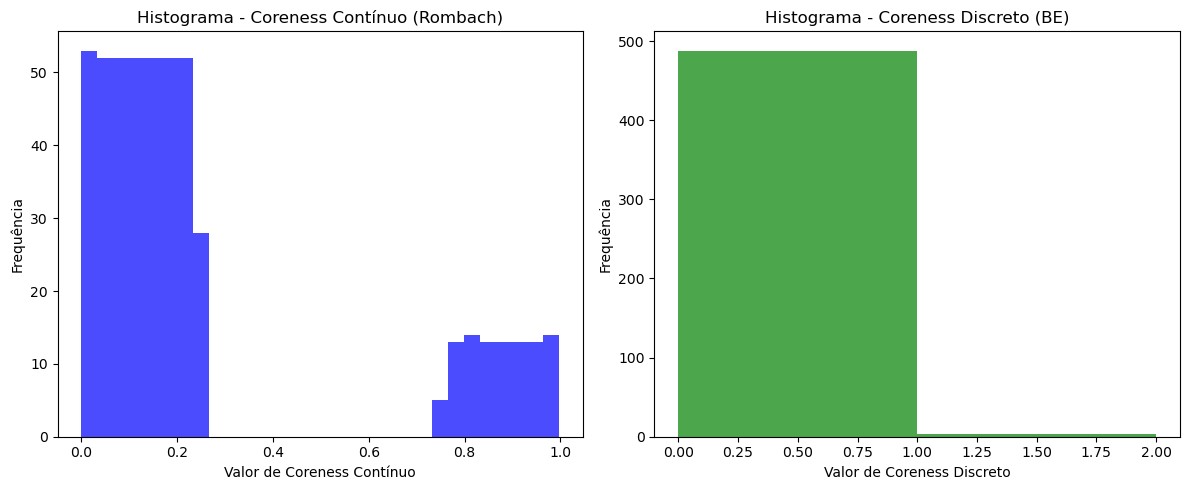


Top 5 nós - Centro-Periferia Contínuo (Rombach):
Vértice 286: coreness_cont = 0.9974747474747475
Vértice 379: coreness_cont = 0.9949494949494949
Vértice 356: coreness_cont = 0.9924242424242424
Vértice 86: coreness_cont = 0.9898989898989898
Vértice 375: coreness_cont = 0.9873737373737373

Top 5 nós - Centro-Periferia Discreto (BE):
Vértice 286: coreness_disc = 1.0
Vértice 356: coreness_disc = 1.0
Vértice 379: coreness_disc = 1.0
Vértice 0: coreness_disc = 0.0
Vértice 1: coreness_disc = 0.0


In [39]:
import graph_tool_extras as gte
import cpnet
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

g = gte.load('papers_citation_100.net.gz')

coreness_cont, level_map_cont = gte.coreness(g, cpnet.Rombach)
coreness_disc, level_map_disc, prob_map = gte.coreness(g, cpnet.BE, test=True)

coreness_cont_values = np.array([coreness_cont[v] for v in g.vertices()])
coreness_disc_values = np.array([coreness_disc[v] for v in g.vertices()])

print("=== Centro-Periferia Contínuo (Rombach) ===")
print("Mínimo:", np.min(coreness_cont_values))
print("Máximo:", np.max(coreness_cont_values))
print("Média:", np.mean(coreness_cont_values))
print("Mediana:", np.median(coreness_cont_values))
print("Desvio Padrão:", np.std(coreness_cont_values))

print("\n=== Centro-Periferia Discreto (BE) ===")
print("Mínimo:", np.min(coreness_disc_values))
print("Máximo:", np.max(coreness_disc_values))
print("Média:", np.mean(coreness_disc_values))
print("Mediana:", np.median(coreness_disc_values))
print("Desvio Padrão:", np.std(coreness_disc_values))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(coreness_cont_values, bins=30, color='blue', alpha=0.7)
plt.title("Histograma - Coreness Contínuo (Rombach)")
plt.xlabel("Valor de Coreness Contínuo")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
bins_disc = range(int(np.min(coreness_disc_values)), int(np.max(coreness_disc_values)) + 2)
plt.hist(coreness_disc_values, bins=bins_disc, color='green', alpha=0.7)
plt.title("Histograma - Coreness Discreto (BE)")
plt.xlabel("Valor de Coreness Discreto")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

def top5_sorted(prop_map):
    return sorted(g.vertices(), key=lambda v: prop_map[v], reverse=True)[:5]

top5_cont = top5_sorted(coreness_cont)
top5_disc = top5_sorted(coreness_disc)

print("\nTop 5 nós - Centro-Periferia Contínuo (Rombach):")
for v in top5_cont:
    print(f"Vértice {int(v)}: coreness_cont = {coreness_cont[v]}")

print("\nTop 5 nós - Centro-Periferia Discreto (BE):")
for v in top5_disc:
    print(f"Vértice {int(v)}: coreness_disc = {coreness_disc[v]}")


Média dos modos = 3.56 anos


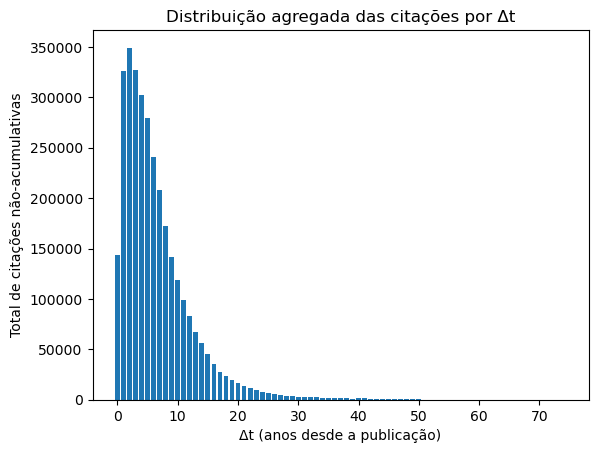

In [1]:
import pandas as pd
from ast import literal_eval
from collections import defaultdict, Counter
import matplotlib.pyplot as plt


PATH = '../Datasets/artigos.csv'
df = pd.read_csv(PATH)          
df['year'] = df['year'].astype(int)


pub_year   = dict(zip(df['id'], df['year']))   
histograms = defaultdict(Counter)                    


for _, row in df.iterrows():
    citing_year = row['year']            
    try:
        refs = literal_eval(row['references'])      
    except Exception:
        continue
    for pid in refs:
        if pid in pub_year:
            delta = citing_year - pub_year[pid]
            if delta >= 0:
                histograms[pid][delta] += 1


modes = []
for pid, counter in histograms.items():
    if counter:                          

        mode_dt = max(counter.items(), key=lambda x: (x[1], -x[0]))[0]
        modes.append(mode_dt)

mean_of_modes = sum(modes) / len(modes)
print(f"Média dos modos = {mean_of_modes:.2f} anos")


agg = Counter()
for c in histograms.values():
    agg.update(c)

xs = sorted(agg)
ys = [agg[x] for x in xs]

plt.figure()
plt.bar(xs, ys)
plt.xlabel('Δt (anos desde a publicação)')
plt.ylabel('Total de citações não‑acumulativas')
plt.title('Distribuição agregada das citações por Δt')
plt.show()


In [1]:
import pandas as pd, numpy as np, os, json, ast, gc, pickle
from graph_tool.all import Graph
from graph_tool.centrality import betweenness
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import defaultdict

DATA_PATH = "../Datasets/artigos.csv"
CACHE_DIR = "./cache_gt"
os.makedirs(CACHE_DIR, exist_ok=True)

In [2]:
def parse_refs(x):
    if pd.isna(x): return []
    if isinstance(x, list): return x
    try:
        return json.loads(x)
    except:
        try:
            return ast.literal_eval(x)
        except:
            return []

def chunk_reader(cols, chunksize=20000):
    return pd.read_csv(DATA_PATH, usecols=cols, chunksize=chunksize, low_memory=False)

In [3]:
AUTH_MAP, YEAR_MAP = {}, {}
for chunk in chunk_reader(["id", "year", "authors"]):
    for pid, yr, authors in zip(chunk["id"].astype(str), chunk["year"], chunk["authors"]):
        YEAR_MAP[pid] = int(yr) if not pd.isna(yr) else None
        AUTH_MAP[pid] = len(parse_refs(authors))

In [4]:
records = []

for Y in range(1937, 2014):
    print(f"Ano base: {Y}")
    

    betw_file = os.path.join(CACHE_DIR, f"betw_{Y}.pkl")
    if os.path.exists(betw_file):
        betw_map = pickle.load(open(betw_file, "rb"))
    else:
        g, id2idx = Graph(directed=True), {}
        for chunk in chunk_reader(["id", "year", "references"]):
            chunk = chunk.dropna(subset=["year"])
            yrs = chunk["year"].astype(int)
            mask = yrs <= Y
            for pid, refs in zip(chunk.loc[mask, "id"].astype(str), chunk.loc[mask, "references"]):
                if pid not in id2idx:
                    id2idx[pid] = int(g.add_vertex())
                src = id2idx[pid]
                for ref in parse_refs(refs):
                    ref = str(ref)
                    if ref not in id2idx:
                        id2idx[ref] = int(g.add_vertex())
                    dst = id2idx[ref]
                    g.add_edge(g.vertex(src), g.vertex(dst))
        v_bet, _ = betweenness(g, norm=False)
        betw_map = {pid: float(v_bet[g.vertex(idx)]) for pid, idx in id2idx.items()}
        pickle.dump(betw_map, open(betw_file, "wb"))
        del g, v_bet, id2idx
        gc.collect()


    indeg_file = os.path.join(CACHE_DIR, f"indeg_{Y+3}.pkl")
    if os.path.exists(indeg_file):
        indeg_map = pickle.load(open(indeg_file, "rb"))
    else:
        gY3, id2idx_y3 = Graph(directed=True), {}
        for chunk in chunk_reader(["id", "year", "references"]):
            yrs = chunk["year"].astype(int)
            mask = yrs == (Y + 3)
            for pid, refs in zip(chunk.loc[mask, "id"].astype(str), chunk.loc[mask, "references"]):
                if pid not in id2idx_y3:
                    id2idx_y3[pid] = int(gY3.add_vertex())
                src = id2idx_y3[pid]
                for ref in parse_refs(refs):
                    ref = str(ref)
                    if ref not in id2idx_y3:
                        id2idx_y3[ref] = int(gY3.add_vertex())
                    dst = id2idx_y3[ref]
                    gY3.add_edge(gY3.vertex(src), gY3.vertex(dst))
        indeg_map = {pid: gY3.vertex(idx).in_degree() for pid, idx in id2idx_y3.items()}
        pickle.dump(indeg_map, open(indeg_file, "wb"))
        del gY3, id2idx_y3
        gc.collect()

    for pid, betw in betw_map.items():
        if YEAR_MAP.get(pid) == Y:
            records.append({
                "paper_id": pid,
                "year": Y,
                "betw_init": betw,
                "deg_in_t3": indeg_map.get(pid, 0),
                "n_authors": AUTH_MAP.get(pid, 1)
            })

Ano base: 1937
Ano base: 1938
Ano base: 1939
Ano base: 1940
Ano base: 1941
Ano base: 1942
Ano base: 1943
Ano base: 1944
Ano base: 1945
Ano base: 1946
Ano base: 1947
Ano base: 1948
Ano base: 1949
Ano base: 1950
Ano base: 1951
Ano base: 1952
Ano base: 1953
Ano base: 1954
Ano base: 1955
Ano base: 1956
Ano base: 1957
Ano base: 1958
Ano base: 1959
Ano base: 1960
Ano base: 1961
Ano base: 1962
Ano base: 1963
Ano base: 1964
Ano base: 1965
Ano base: 1966
Ano base: 1967
Ano base: 1968
Ano base: 1969
Ano base: 1970
Ano base: 1971
Ano base: 1972
Ano base: 1973
Ano base: 1974
Ano base: 1975
Ano base: 1976
Ano base: 1977
Ano base: 1978
Ano base: 1979
Ano base: 1980
Ano base: 1981
Ano base: 1982
Ano base: 1983
Ano base: 1984
Ano base: 1985
Ano base: 1986
Ano base: 1987
Ano base: 1988
Ano base: 1989
Ano base: 1990
Ano base: 1991
Ano base: 1992
Ano base: 1993
Ano base: 1994
Ano base: 1995
Ano base: 1996
Ano base: 1997
Ano base: 1998
Ano base: 1999
Ano base: 2000
Ano base: 2001
Ano base: 2002
Ano base: 

In [5]:
reg_df = pd.DataFrame(records)
reg_df["log_betw_init"]  = np.log1p(reg_df["betw_init"].astype("float32"))
reg_df["log_deg_in_t3"]  = np.log1p(reg_df["deg_in_t3"].astype("float32"))
reg_df["log_n_authors"]  = np.log1p(reg_df["n_authors"].astype("float32"))
print(reg_df.shape)

(625809, 8)


In [6]:
X = sm.add_constant(reg_df[["log_betw_init", "log_n_authors"]])
y = reg_df["log_deg_in_t3"]
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          log_deg_in_t3   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                 3.011e+04
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        13:28:13   Log-Likelihood:            -3.9511e+05
No. Observations:              625809   AIC:                         7.902e+05
Df Residuals:                  625806   BIC:                         7.903e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0891      0.002     40.541

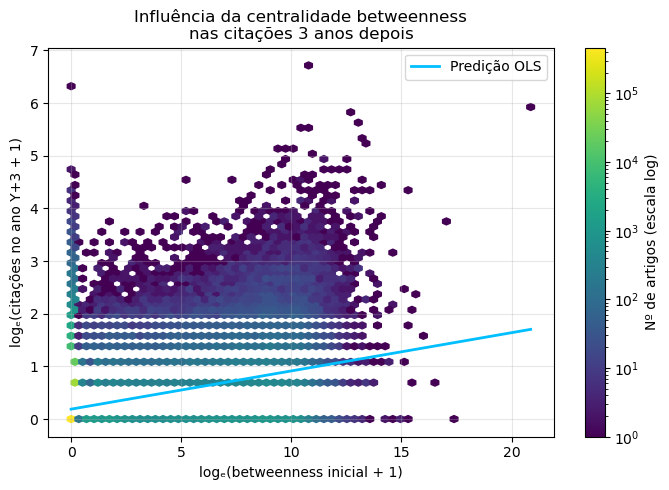

In [11]:

from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots(figsize=(7, 5))

hb = ax.hexbin(
    plot_df["log_betw_init"],
    plot_df["log_deg_in_t3"],
    gridsize=60,          
    cmap="viridis",
    mincnt=1,               
    norm=LogNorm()          
)

cb = fig.colorbar(hb, ax=ax, label="Nº de artigos (escala log)")


x_vals = np.linspace(plot_df["log_betw_init"].min(),
                     plot_df["log_betw_init"].max(), 200)
X_line = pd.DataFrame({
    "const": 1.0,
    "log_betw_init": x_vals,
    "log_n_authors": plot_df["log_n_authors"].mean()
})
y_pred = model.predict(X_line)
ax.plot(x_vals, y_pred, color="deepskyblue", lw=2, label="Predição OLS")


ax.set_xlabel("logₑ(betweenness inicial + 1)")
ax.set_ylabel("logₑ(citações no ano Y+3 + 1)")
ax.set_title("Influência da centralidade betweenness\nnas citações 3 anos depois")
ax.legend()
ax.grid(alpha=0.3)
fig.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:          log_deg_in_t3   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3351.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        13:57:46   Log-Likelihood:            -4.2219e+05
No. Observations:              625809   AIC:                         8.444e+05
Df Residuals:                  625807   BIC:                         8.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0952      0.002     41.510

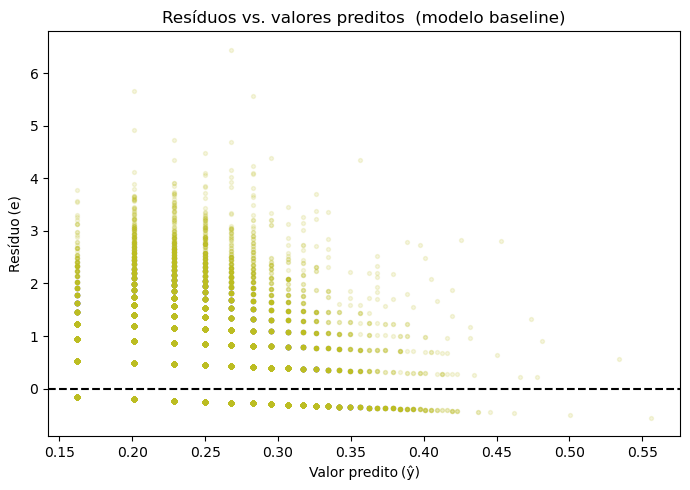

In [19]:
#MODELO BASELINE  (degree ~ nº de autores) 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm
from scipy.stats import norm

Xb = sm.add_constant(reg_df[["log_n_authors"]])
yb = reg_df["log_deg_in_t3"]
model_base = sm.OLS(yb, Xb).fit()
print(model_base.summary())

reg_df["fitted_b"]   = model_base.fittedvalues
reg_df["residual_b"] = model_base.resid

vis_b = reg_df.sample(200_000, random_state=456)

plt.figure(figsize=(7,5))
plt.scatter(vis_b["fitted_b"], vis_b["residual_b"],
            s=8, alpha=0.15, color="tab:olive")
plt.axhline(0, color="k", ls="--")
plt.xlabel("Valor predito (ŷ)")
plt.ylabel("Resíduo (e)")
plt.title("Resíduos vs. valores preditos  (modelo baseline)")
plt.tight_layout()
plt.savefig("baseline_residuos.png", dpi=150)
plt.show()


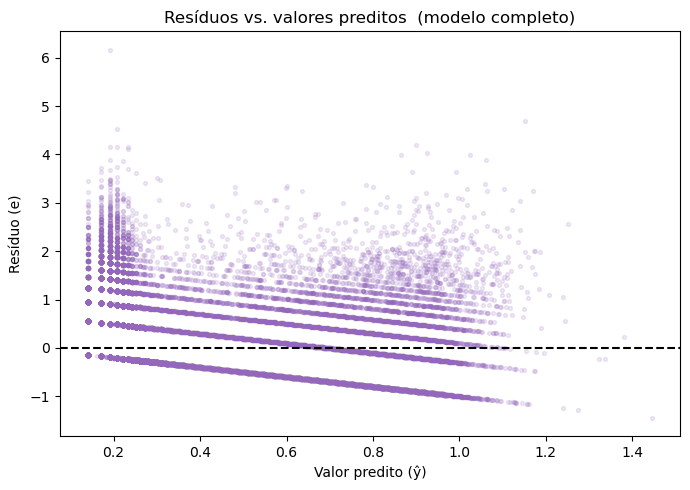

In [18]:
# GRÁFICOS DE RESÍDUOS  (MODELO COMPLETO)
import numpy as np, matplotlib.pyplot as plt, statsmodels.api as sm
from scipy.stats import norm


reg_df["fitted_c"]   = model.fittedvalues
reg_df["residual_c"] = model.resid


vis_c = reg_df.sample(200_000, random_state=321)


plt.figure(figsize=(7,5))
plt.scatter(vis_c["fitted_c"], vis_c["residual_c"],
            s=8, alpha=0.15, color="tab:purple")
plt.axhline(0, color="k", ls="--")
plt.xlabel("Valor predito (ŷ)")
plt.ylabel("Resíduo (e)")
plt.title("Resíduos vs. valores preditos  (modelo completo)")
plt.tight_layout()
plt.savefig("completo_residuos.png", dpi=150)   
plt.show()

